In [7]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2hed
from skimage.color import rgb2hsv


In [15]:
#image = imread("/home/robin/Downloads/saturation.png")[:1000,:1000]
img = imread('rgb_good_.jpg')[:1000,:1000]

<IPython.core.display.Javascript object>


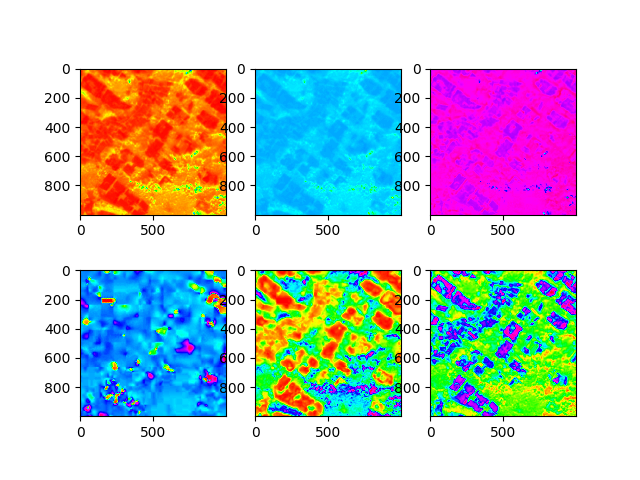

In [3]:
hed = rgb2hed(img)
hsv = rgb2hsv(img)

plt.figure()

plt.subplot(2,3,1)
plt.imshow(hed[...,0], cmap ='hsv')
plt.subplot(2,3,2)
plt.imshow(hed[...,1], cmap ='hsv')
plt.subplot(2,3,3)
plt.imshow(hed[...,2], cmap ='hsv')
plt.subplot(2,3,4)
plt.imshow(hsv[...,0], cmap ='hsv')
plt.subplot(2,3,5)
plt.imshow(hsv[...,1], cmap ='hsv')
plt.subplot(2,3,6)
plt.imshow(hsv[...,2], cmap ='hsv')
plt.show()

In [4]:
distance = distance_transform_edt(hsv[:,:,1])

In [8]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(hsv[...,1], cmap ='gray')
plt.subplot(1,2,2)
plt.imshow(distance, cmap ='gray')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


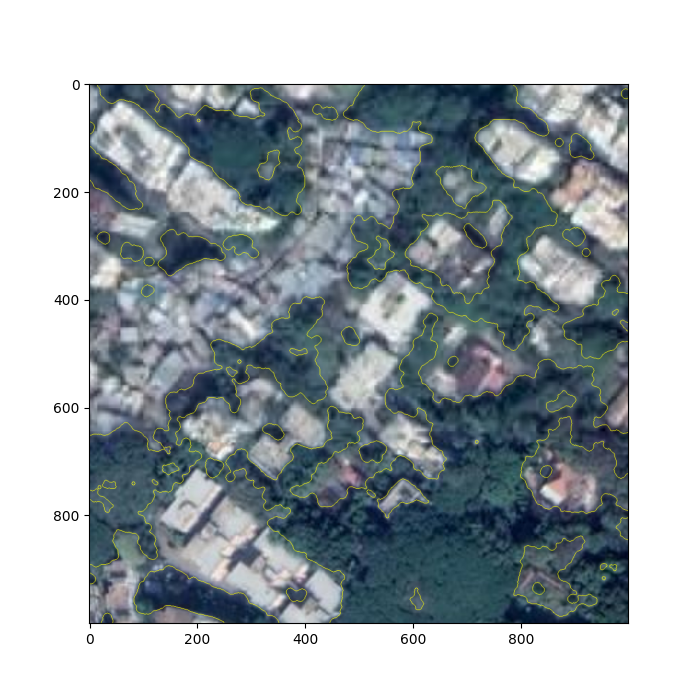

In [18]:
from skimage.color import rgb2hed
from skimage.filters import threshold_otsu
from skimage.morphology import opening,closing,disk
from skimage.segmentation import mark_boundaries
from skimage import img_as_float


t = threshold_otsu(hsv[...,1])
mask = hsv[...,1]>t
mask = closing(opening(mask, disk(7)), disk(3))
mask1 = img_as_float(mask)

plt.figure(figsize = (7,7))
plt.imshow(mark_boundaries(img,mask))
plt.show()

In [10]:
from skimage.util import img_as_uint
maask = img_as_uint(mask)

In [11]:
import numpy as np
import cv2 as cv
drawing = False # true if mouse is pressed

def toggle(event,x,y,flags,param):
    global drawing, final
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = not drawing
    if drawing:
        final = img.copy()[:,:,::-1]#img_as_ubyte()
    else:
        final = normalised
        

normalised = maask.copy()#cv.normalize(mask, None, 0, 255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
final = img.copy()[:,:,::-1]
cv.namedWindow("image", cv.WINDOW_NORMAL)
cv.setMouseCallback('image',toggle)

while True:
    
    cv.imshow("image", final)
    k = cv.waitKey(1) 
    if k == 27:
        break
cv.destroyAllWindows()

<IPython.core.display.Javascript object>


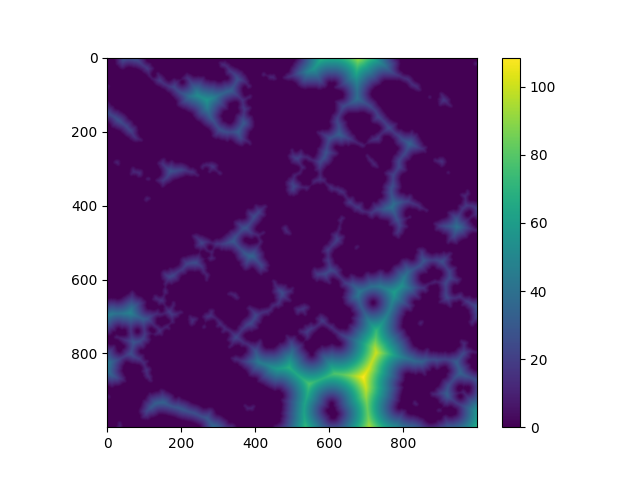

In [12]:
from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(mask)

plt.figure()
plt.imshow(distance)
plt.colorbar()
plt.show()

In [13]:
from skimage.feature import peak_local_max

markers = peak_local_max(distance, min_distance=3, indices=True)

/tmp/ipykernel_7813/494535327.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = peak_local_max(distance, min_distance=3, indices=True)


In [15]:
print(markers.shape)

(233, 2)


<IPython.core.display.Javascript object>


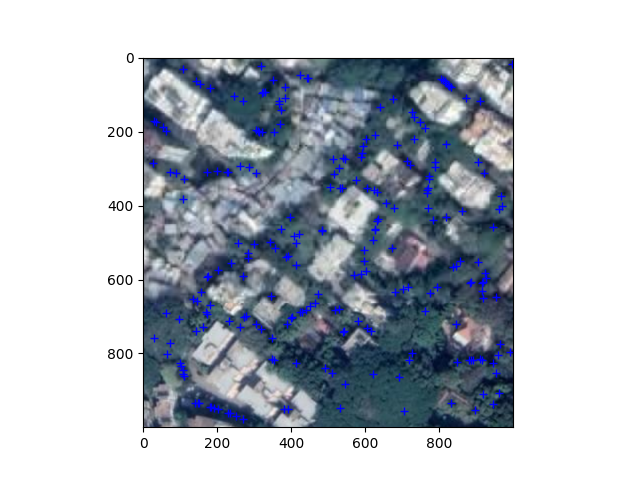

In [14]:
plt.figure()
plt.imshow(img)
for m in markers:
    plt.plot(m[1],m[0],'b+')
plt.show()

/home/robin/spacex/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_7813/1685421639.py:6: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = label(peak_local_max(distance, min_distance=2, indices=False))


<IPython.core.display.Javascript object>


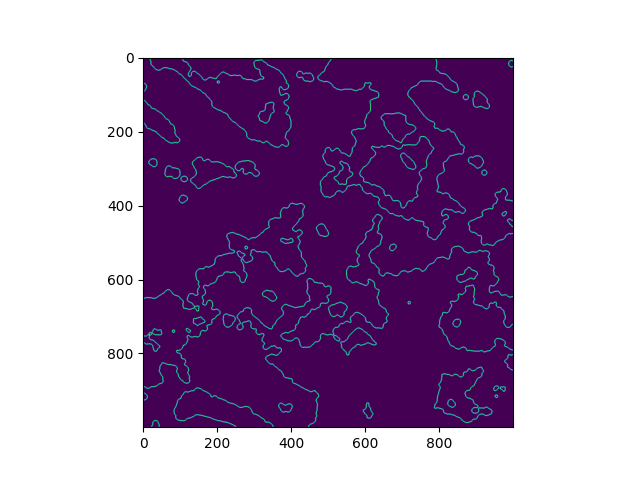

In [15]:
from skimage.filters.rank import gradient
from skimage.measure import label
from skimage.morphology import watershed

grad = gradient(mask1,disk(1))
markers = label(peak_local_max(distance, min_distance=2, indices=False))

plt.figure()
plt.imshow(grad)
plt.show()

/home/robin/spacex/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


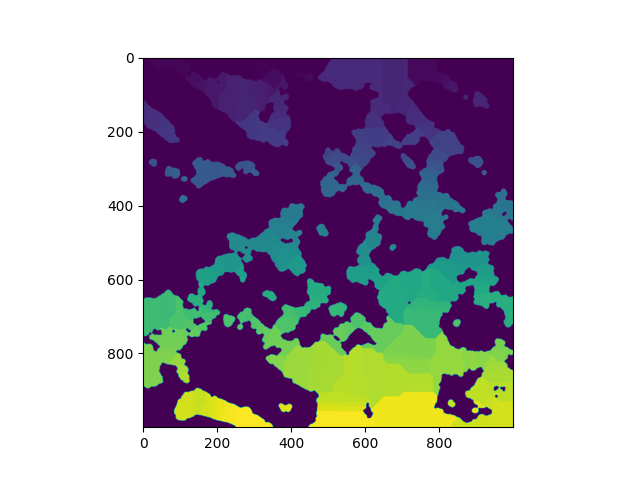

In [16]:
ws = watershed(grad,markers,mask=mask)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(img, mask))
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(img,ws))
plt.figure()
plt.imshow(ws)
plt.show()

In [24]:
>>> from skimage import data
>>> from skimage.morphology import disk, ball
>>> from skimage.filters.rank import gradient
>>> import numpy as np
>>> img = data.camera()
>>> rng = np.random.default_rng()
>>> volume = rng.integers(0, 255, size=(10,10,10), dtype=np.uint8)
>>> out = gradient(img, disk(5))
>>> out_vol = gradient(volume, ball(5))

In [22]:
from skimage.filters import threshold_multiotsu
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from skimage.io import imread,imsave
from skimage.color import rgb2hsv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
img = imread("/home/robin/Pictures/test.png")[...,:3]
hsv = rgb2hsv(img)


In [3]:
image = hsv[:,:,1].copy()

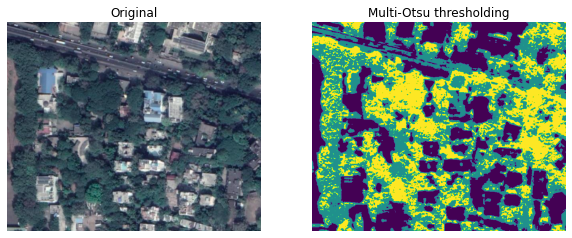

In [4]:
thresholds = threshold_multiotsu(image, classes=3)
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

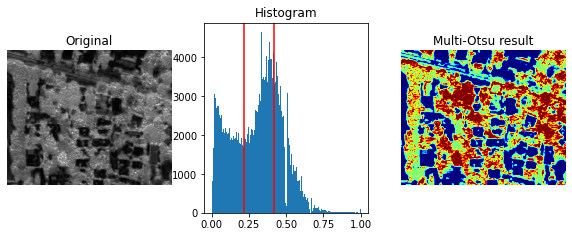

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()


In [6]:
thresholds

array([0.21679688, 0.41601562])

In [7]:
a = (image <= thresholds[0] )
b = (image > thresholds[0]) & (image <= thresholds[1] )
#c = (image > thresholds[2]) & (image <= thresholds[3] )

d = (image > thresholds[1])

label1 = measure.label(a)
label2 = measure.label(b)
#label3 = measure.label(c)
label4 = measure.label(d)


In [11]:
label4 = measure.label(d, connectivity=2)


<IPython.core.display.Javascript object>


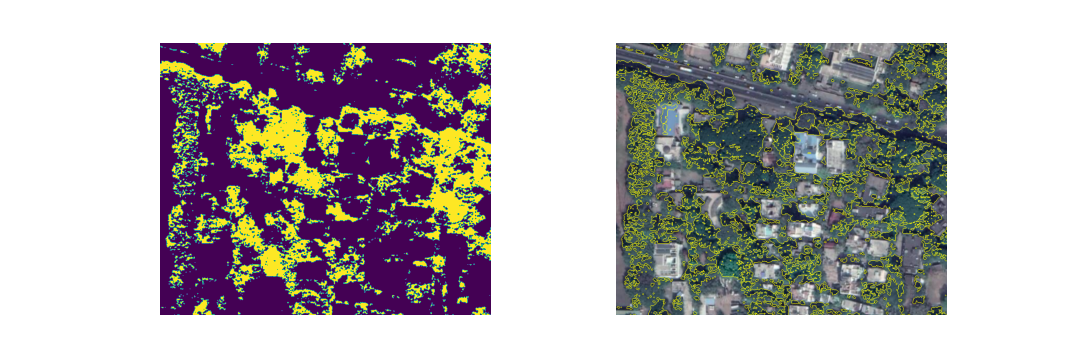

(-0.5, 665.5, 546.5, -0.5)

In [28]:
from skimage.segmentation import mark_boundaries

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(d)
ax[0].axis('off')
ax[1].imshow(mark_boundaries(img,d))
ax[1].axis('off')

In [25]:
len(mark_boundaries(img,d))

547

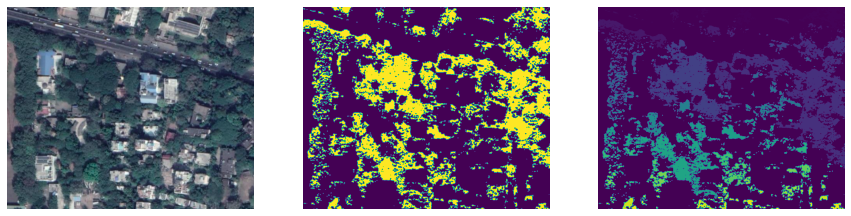

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(d)
ax[1].axis('off')
ax[2].imshow(label4)
ax[2].axis('off')

plt.show()

In [42]:
from skimage.util import img_as_ubyte
import cv2
image = img_as_ubyte(img)
maask = ~img_as_ubyte(a)

In [44]:
maasked = cv2.bitwise_and(img[...,::-1], img[...,::-1], mask=maask)
cv2.imshow("hi", maasked)
cv2.waitKey(0)
cv2.destroyAllWindows()

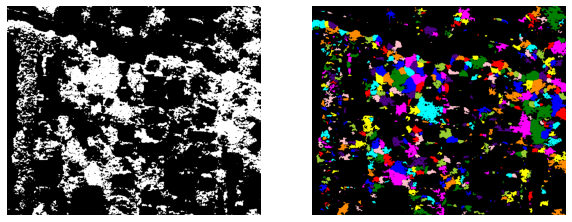

In [17]:
distance = ndi.distance_transform_edt(d)

local_max_coords = feature.peak_local_max(distance, min_distance=7)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)

segmented_cells = segmentation.watershed(-distance, markers, mask=d)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(d, cmap='gray')

ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))

ax[1].axis('off')
plt.show()

In [15]:
print(segmented_cells.max())

710


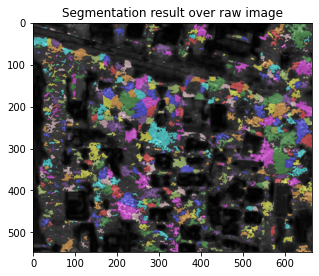

In [16]:
color_labels = color.label2rgb(segmented_cells, image, alpha=0.4, bg_label=0)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(color_labels)
ax.set_title('Segmentation result over raw image')
plt.show()